2 Test Driven Development

Build an AlphaVantageAPI class using the code used to access the API . Second,create an SQLRepository class to help load the stock data into a SQLite database and then extract it for later use. Build the code using test driven development by using  assert statements to make sure everything is working properly. That way, issues will be avoided later when building the application.

In [50]:
%load_ext autoreload
%load_ext sql
%autoreload 2

import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from config import settings

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The sql extension is already loaded. To reload it, use:
  %reload_ext sql


2.1 In the data module, initialize a class definition for AlphaVantageAPI using the __init__ method that attaches the API key as the attribute __api_key.Import the AlphaVantageAPI class and create an instance of it called av.

In [51]:
# Import `AlphaVantageAPI`
from data import AlphaVantageAPI

# Create instance of `AlphaVantageAPI` class
av = AlphaVantageAPI()

print("av type:", type(av))

av type: <class 'data.AlphaVantageAPI'>


2.1.1 Create a get_daily method for the AlphaVantageAPI class then fetch the stock data

In [52]:
# Define Equity Bank ticker symbol
ticker = "EQTY"

# Use your `av` object to get daily data
df_equity = av.get_daily(ticker=ticker)

print("df_equity type:", type(df_equity))
print("df_equity shape:", df_equity.shape)
df_equity.head()

df_equity type: <class 'pandas.core.frame.DataFrame'>
df_equity shape: (54, 5)


,open,high,low,close,volume
date,,,,,
2023-03-01,16.8800,16.9000,16.73,16.7850,78388.0
2023-02-28,16.8811,16.9000,16.83,16.8800,8621.0
2023-02-27,16.8900,16.9781,16.82,16.8500,27415.0
2023-02-24,16.7900,16.8260,16.67,16.8063,20330.0
2023-02-23,17.0700,17.0800,16.87,17.0000,44770.0


In [53]:
# Does `get_daily` return a DataFrame?
assert isinstance(df_equity, pd.DataFrame)
# Does DataFrame have 5 columns?
assert df_equity.shape[1] == 5

# Does DataFrame have a DatetimeIndex?

assert isinstance(df_equity.index, pd.DatetimeIndex)
# Is the index name "date"?
assert df_equity.index.name == "date"

In [54]:
# Does DataFrame have correct column names?
assert df_equity.columns.to_list() == ['open', 'high', 'low', 'close', 'volume']
# Are columns correct data type?
assert all(df_equity.dtypes == float)

2.2 SQL Repository Class

Store the data in a database to make it easier for the application to easily retrieve the data without going to the Alphavantage API everytime. Because the data is highly structured use an SQL database.

Use SQLite for the database. For consistency, this database will always have the same name, stored in the .env file.

2.2.1 Connect to the database.  Set the check_same_thread argument to False. Assign the connection to the variable connection.

In [55]:
settings.db_name

'stocks.sqlite'

In [56]:
connection = sqlite3.connect(database=settings.db_name, check_same_thread=False )

print("connection type:", type(connection))

connection type: <class 'sqlite3.Connection'>


Connection is set. Build the class to handle all transactions with the database. Write two tests beforehand to ensure the class is working as intendend

Write two tests for the SQLRepository class


In [57]:
# Import class definition
from data import SQLRepository

# Create instance of class
repo = SQLRepository(connection=connection)

# Does `repo` have a "connection" attribute?
hasattr(repo, "connection")

# Is the "connection" attribute a SQLite `Connection`?
assert isinstance(repo.connection, sqlite3.Connection)

2.2.2 Create a definition for the SQLRepository class.Initialize the class using the __init__ method. Test the method using the 2 ascert statements made above

Next, add the insert_table method to SQLRepository class to store information in the SQL. Run the ascert statements to ensure the method is working well

In [58]:
response = repo.insert_table(table_name=ticker, records=df_equity, if_exists="replace")

# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct?
assert sorted(list(response.keys())) == ["records_inserted", "transaction_successful"]

In [59]:
#Connect to the sqlite
%sql sqlite:////workspaces/codespaces-jupyter/notebooks/stocks.sqlite

In [60]:
%%sql
SELECT *
FROM "EQTY"
LIMIT 5

 * sqlite:////workspaces/codespaces-jupyter/notebooks/stocks.sqlite
Done.


date,open,high,low,close,volume
2023-03-01 00:00:00,16.88,16.9,16.73,16.785,78388.0
2023-02-28 00:00:00,16.8811,16.9,16.83,16.88,8621.0
2023-02-27 00:00:00,16.89,16.9781,16.82,16.85,27415.0
2023-02-24 00:00:00,16.79,16.826,16.67,16.8063,20330.0
2023-02-23 00:00:00,17.07,17.08,16.87,17.0,44770.0


In [61]:
#write a SQL query to get all the Equity data(Testing if the SQL database is working)
sql = "SELECT * FROM 'EQTY'"
df_equity_test = pd.read_sql(
   sql=sql,con=connection ,parse_dates=["date"], index_col="date"
)

print("df_equity_test type:", type(df_equity_test))
print()
print(df_equity_test.info())
df_equity_test.head()

df_equity_test type: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2023-03-01 to 2022-12-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    54 non-null     float64
 1   high    54 non-null     float64
 2   low     54 non-null     float64
 3   close   54 non-null     float64
 4   volume  54 non-null     float64
dtypes: float64(5)
memory usage: 2.5 KB
None


,open,high,low,close,volume
date,,,,,
2023-03-01,16.8800,16.9000,16.73,16.7850,78388.0
2023-02-28,16.8811,16.9000,16.83,16.8800,8621.0
2023-02-27,16.8900,16.9781,16.82,16.8500,27415.0
2023-02-24,16.7900,16.8260,16.67,16.8063,20330.0
2023-02-23,17.0700,17.0800,16.87,17.0000,44770.0


Add the read_table method to SQLRepository class to store information in the SQL. Run the ascert statements to ensure the method is working well

In [62]:
#test your read_table function
# Assign `read_table` output to `df_coop`
df_coop = repo.read_table(table_name="COOP", limit=2500)  # noQA F821

# Is `df_coop` a DataFrame?
assert isinstance(df_coop, pd.DataFrame)
# Does it have a `DatetimeIndex`?
assert isinstance(df_coop.index, pd.DatetimeIndex)
# Is the index named "date"?
assert df_coop.index.name == "date"

# Does it have  rows and 5 columns?
assert df_coop.shape== (2500, 5)

# Are the column names correct?
assert df_coop.columns.to_list() == ['open', 'high', 'low', 'close', 'volume']


# Are the column data types correct?
assert all(df_coop.dtypes == float)

# Print `df_coop` info
print("df_coop shape:", df_coop.shape)
print()
print(df_coop.info())
df_coop.head()

df_coop shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2023-03-01 to 2013-03-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2023-03-01,46.24,47.0300,45.92,46.81,356388.0
2023-02-28,46.90,47.9275,46.42,46.43,916349.0
2023-02-27,46.47,47.4800,46.47,46.93,355692.0
2023-02-24,45.77,46.4600,45.56,46.23,373005.0
2023-02-23,46.38,46.8900,45.82,46.52,389625.0


In [63]:
#Expand on the code  above to complete the read_table function 

def read_table(table_name, limit=None):

    """Read table from database.

    Parameters
    ----------
    table_name : str
        Name of table in SQLite database.
    limit : int, None, optional
        Number of most recent records to retrieve. If `None`, all
        records are retrieved. By default, `None`.

    Returns
    -------
    pd.DataFrame
        Index is DatetimeIndex "date". Columns are 'open', 'high',
        'low', 'close', and 'volume'. All columns are numeric.
    """
    # Create SQL query (with optional limit)
    if limit:
        sql=f"SELECT * FROM '{table_name}' LIMIT {limit}"
    else:
        sql=f"SELECT * FROM '{table_name}'"
    

    # Retrieve data, read into DataFrame
    df =  pd.read_sql(
       sql=sql, con=connection ,parse_dates=["date"], index_col="date"
    )


    # Return DataFrame
    return df

In [64]:
ticker = "SLAM"

# Get Sanlam data using `av`
slam_records = av.get_daily(ticker=ticker)

# Insert `sanlam_records` database using `repo`
response = repo.insert_table(
    table_name=ticker,records=slam_records, if_exists="replace"
)

response

{'transaction_successful': True, 'records_inserted': 472}

In [65]:
#Using the read_table method you've added to your SQLRepository, extract the most recent 470 rows of data
ticker = "SLAM"
df_sanlam = repo.read_table(table_name=ticker, limit=470)

print("df_sanlam type:", type(df_sanlam))
print("df_sanlam shape:", df_sanlam.shape)
df_sanlam.head()

df_sanlam type: <class 'pandas.core.frame.DataFrame'>
df_sanlam shape: (470, 5)


,open,high,low,close,volume
date,,,,,
2023-03-01,10.2300,10.2500,10.2300,10.2400,17766.0
2023-02-28,10.2200,10.2400,10.2200,10.2400,15806.0
2023-02-27,10.2100,10.2300,10.2100,10.2300,26308.0
2023-02-24,10.2000,10.2100,10.2000,10.2100,509.0
2023-02-23,10.2001,10.2147,10.2001,10.2101,3218.0


In [66]:
ticker = "CIC"

# Get Sanlam data using `av`
cic_records = av.get_daily(ticker=ticker)

# Insert `sanlam_records` database using `repo`
response = repo.insert_table(
    table_name=ticker,records=cic_records, if_exists="replace"
)

response

{'transaction_successful': True, 'records_inserted': 1354}

In [67]:
#Using the read_table method you've added to your SQLRepository, extract the most recent 470 rows of data
ticker = "CIC"
df_cic = repo.read_table(table_name=ticker, limit=470)

print("df_cic type:", type(df_cic))
print("df_cic shape:", df_cic.shape)
df_cic.head()

df_cic type: <class 'pandas.core.frame.DataFrame'>
df_cic shape: (470, 5)


,open,high,low,close,volume
date,,,,,
2023-03-01,7.22,7.270,7.140,7.15,188204.0
2023-02-28,7.24,7.320,7.215,7.24,217542.0
2023-02-27,7.28,7.310,7.210,7.23,167044.0
2023-02-24,7.14,7.255,7.080,7.21,199897.0
2023-02-23,7.11,7.230,7.095,7.20,208546.0


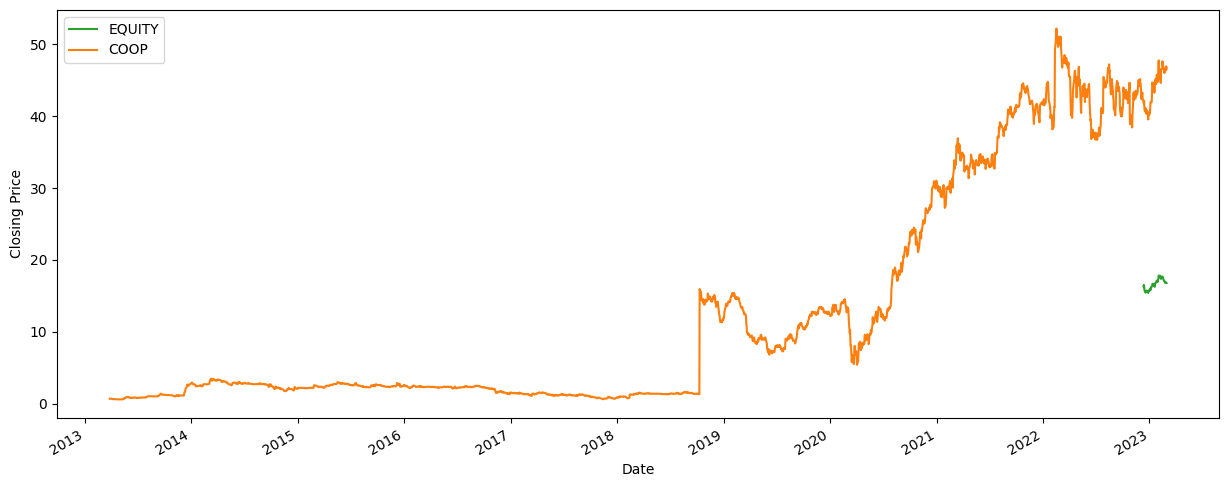

In [68]:
#Plot the closing price of Equity and Cooperative Bank. Label your axes and include a legend

fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_equity` and `df_coop`
df_equity["close"].plot(ax=ax, label= "EQUITY", color="C2")
df_coop["close"].plot(ax=ax, label= "COOP", color="C1")

# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")



# Add legend
plt.legend();



In [69]:
#Add a "return" column to df_equity that shows the percentage change in the "close" column from one day to the next.

# Sort DataFrame ascending by date
df_equity.sort_index(ascending=True, inplace=True)

# Create "return" column
df_equity["return"]=df_equity["close"].pct_change() * 100

print("df_equity shape:", df_equity.shape)
print(df_equity.info())
df_equity.head()

df_equity shape: (54, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2022-12-12 to 2023-03-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    54 non-null     float64
 1   high    54 non-null     float64
 2   low     54 non-null     float64
 3   close   54 non-null     float64
 4   volume  54 non-null     float64
 5   return  53 non-null     float64
dtypes: float64(6)
memory usage: 3.0 KB
None


,open,high,low,close,volume,return
date,,,,,,
2022-12-12,16.2200,16.3389,16.2200,16.3389,201.0,NaN
2022-12-13,16.5500,16.6600,16.4628,16.5200,103009.0,1.108398
2022-12-14,16.2300,16.5500,16.2300,16.3763,42287.0,-0.869855
2022-12-15,15.9177,16.0000,15.7500,15.8330,48542.0,-3.317599
2022-12-16,15.6500,15.7000,15.5600,15.6839,45241.0,-0.941704


In [70]:
#Add a "return" column to df_coop that shows the percentage change in the "close" column from one day to the next.


# Sort DataFrame ascending by date
df_coop.sort_index(ascending=True, inplace=True)

# Create "return" column
df_coop["return"]=df_coop["close"].pct_change() * 100

print("df_coop shape:", df_coop.shape)
print(df_coop.info())
df_coop.head()

df_coop shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2013-03-27 to 2023-03-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2013-03-27,0.701,0.719,0.6800,0.69,127616.0,NaN
2013-03-28,0.660,0.750,0.6501,0.70,61127.0,1.449275
2013-04-01,0.670,0.700,0.6600,0.70,165605.0,0.000000
2013-04-02,0.680,0.700,0.6800,0.69,52137.0,-1.428571
2013-04-03,0.690,0.690,0.6500,0.67,163858.0,-2.898551


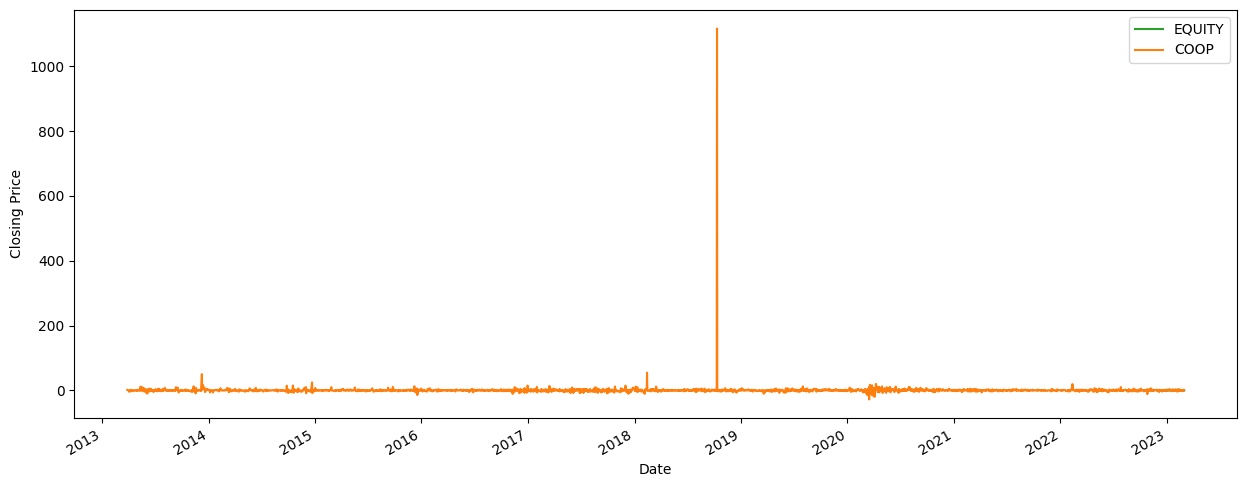

In [71]:
#Plot the returns for df_equity and df_coop. Be sure to label your axes and use legend

fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_equity` and `df_coop`
df_equity["return"].plot(ax=ax, label= "EQUITY", color="C2")
df_coop["return"].plot(ax=ax, label= "COOP", color="C1")

# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")



# Add legend
plt.legend();


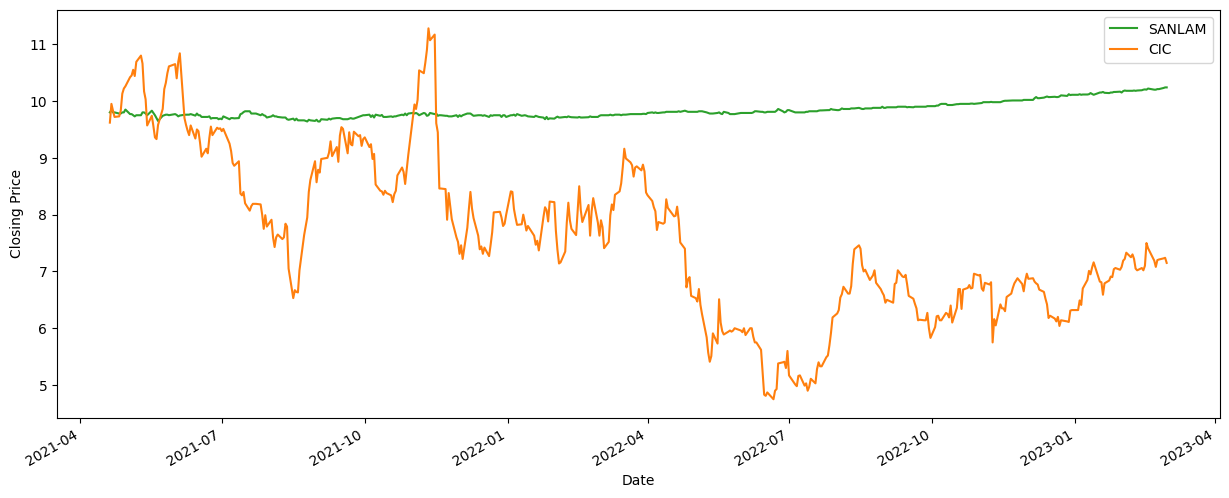

In [72]:
#Plot the closing price of Sanlam and CIC. Label your axes and include a legend


fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_slam` and `df_cic`
df_sanlam["close"].plot(ax=ax, label= "SANLAM", color="C2")
df_cic["close"].plot(ax=ax, label= "CIC", color="C1")

# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")



# Add legend
plt.legend();



In [73]:
##Add a "return" column to df_sanlam that shows the percentage change in the "close" column from one day to the next.


# Sort DataFrame ascending by date
df_sanlam.sort_index(ascending=True, inplace=True)

# Create "return" column
df_sanlam["return"]=df_sanlam["close"].pct_change() * 100

print("df_slam shape:", df_sanlam.shape)
print(df_sanlam.info())
df_sanlam.head()

df_slam shape: (470, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2021-04-20 to 2023-03-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    470 non-null    float64
 1   high    470 non-null    float64
 2   low     470 non-null    float64
 3   close   470 non-null    float64
 4   volume  470 non-null    float64
 5   return  469 non-null    float64
dtypes: float64(6)
memory usage: 25.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2021-04-20,9.8100,9.92,9.54,9.8000,210036.0,NaN
2021-04-21,9.8000,9.84,9.78,9.8400,21055.0,0.408163
2021-04-22,9.8208,9.89,9.78,9.8000,40264.0,-0.406504
2021-04-23,9.7800,9.82,9.78,9.8000,9074.0,0.000000
2021-04-26,9.8000,9.80,9.78,9.7801,4217.0,-0.203061


In [74]:
###Add a "return" column to df_cic that shows the percentage change in the "close" column from one day to the next.


# Sort DataFrame ascending by date
df_cic.sort_index(ascending=True, inplace=True)

# Create "return" column
df_cic["return"]=df_cic["close"].pct_change() * 100

print("df_cic shape:", df_cic.shape)
print(df_cic.info())
df_cic.head()

df_cic shape: (470, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2021-04-20 to 2023-03-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    470 non-null    float64
 1   high    470 non-null    float64
 2   low     470 non-null    float64
 3   close   470 non-null    float64
 4   volume  470 non-null    float64
 5   return  469 non-null    float64
dtypes: float64(6)
memory usage: 25.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2021-04-20,10.23,10.23,9.55,9.62,139133.0,NaN
2021-04-21,9.62,10.03,9.50,9.95,101127.0,3.430353
2021-04-22,9.98,10.15,9.77,9.83,132050.0,-1.206030
2021-04-23,9.77,9.83,9.56,9.72,210142.0,-1.119023
2021-04-26,9.61,9.82,9.50,9.73,146792.0,0.102881


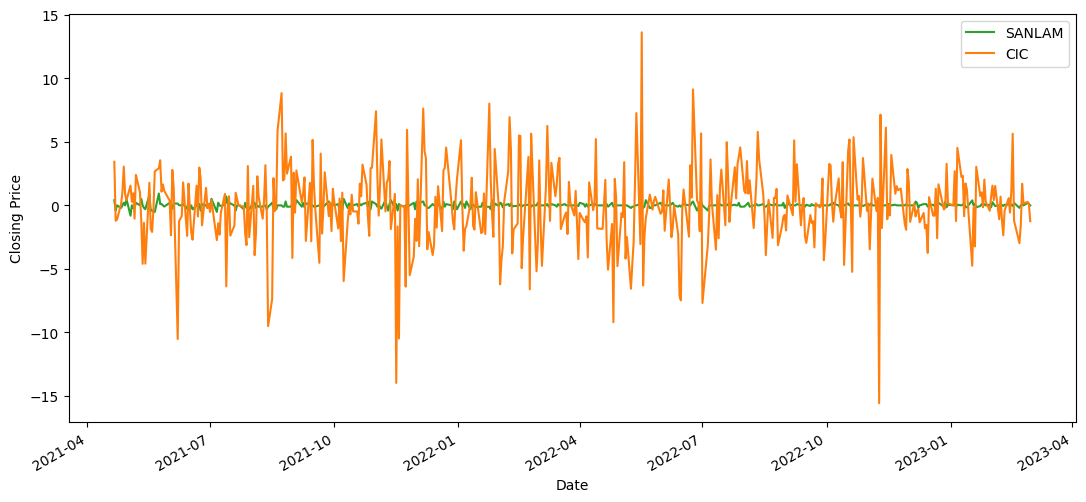

In [75]:
#Plot the returns for df_sanlam and df_cic. Be sure to label your axes and use legend


fig, ax = plt.subplots(figsize=(13, 6))
# Plot `df_sanlam` and `df_cic`
df_sanlam["return"].plot(ax=ax, label= "SANLAM", color="C2")
df_cic["return"].plot(ax=ax, label= "CIC", color="C1")

# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")



# Add legend
plt.legend();

By representing returns as a percentage, we're able to compare two stocks that have very different prices. The returns for CIC have a wider spread. We see big gains and big losses. In contrast, the spread for Sanlam extremely narrow, meaning that the price doesn't fluctuate as much.The choice on whether to trade CIC stock or Sanlam stock depends on the risk appetite of an investor. Highly volatile stocks generally have a potential to have more returns and therefore more profit for the investors. However they are riskier and have a higher potential of making huge losses as compared to less volatile stocks